# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [10]:
# Extract all rows of data
table = soup.find('table')  # Look for the first <table> element
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
table_data = []
columns = []
# Loop through the scraped data to create a list of rows
for i, row in enumerate(rows):
    cols = row.find_all('td')
    # Extract column headers from the first row if applicable
    if i == 0:
        headers = row.find_all('th')
        columns = [header.text.strip() for header in headers]  # Clean header text
    # Clean the text by removing extra spaces and append the data to the table_data list
    if cols:
        table_data.append([ele.text.strip() for ele in cols])

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table_data, columns=columns)

In [16]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [18]:
# Change data types for data analysis
df['id'] = df['id'].astype(str)  # Ensure 'id' is an object (string)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  # Convert to datetime
df['sol'] = df['sol'].astype(int)  # Convert to int
df['ls'] = df['ls'].astype(int)  # Convert to int
df['month'] = df['month'].astype(int)  # Convert to int
df['min_temp'] = df['min_temp'].astype(float)  # Convert to float
df['pressure'] = df['pressure'].astype(float)  # Convert to float

In [19]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
unique_months = df['month'].unique()

# Count the number of unique months
num_months = len(unique_months)

# Print the result
print(f"There are {num_months} months on Mars.")
print(f"Unique months in the dataset: {unique_months}")

There are 12 months on Mars.
Unique months in the dataset: [ 6  7  8  9 10 11 12  1  2  3  4  5]


In [21]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = len(df)

# Print the result
print(f"There are {num_sols} sols (Martian days) worth of data.")

There are 1867 sols (Martian days) worth of data.


In [22]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print("Average minimum temperature by month:")
print(average_min_temp_by_month)

Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


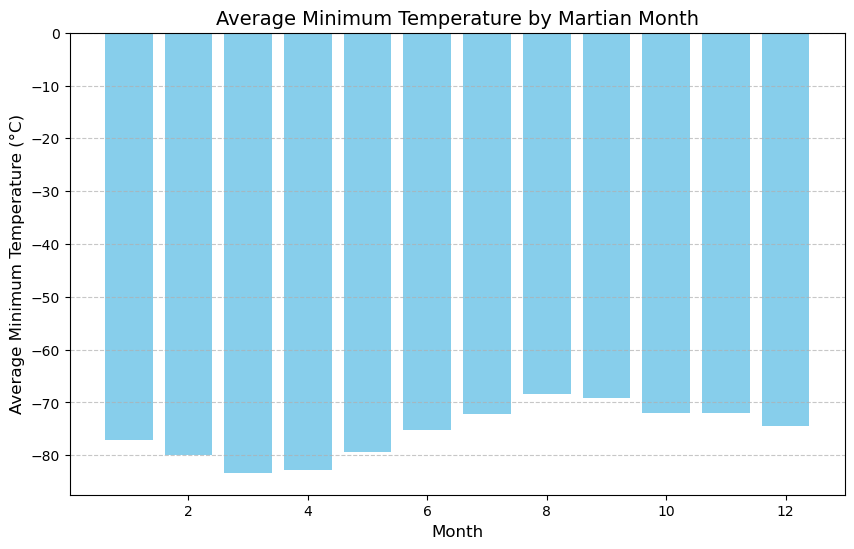

In [25]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
plt.bar(average_min_temp_by_month.index, average_min_temp_by_month.values, color='skyblue')

# Add labels and title
plt.title('Average Minimum Temperature by Martian Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

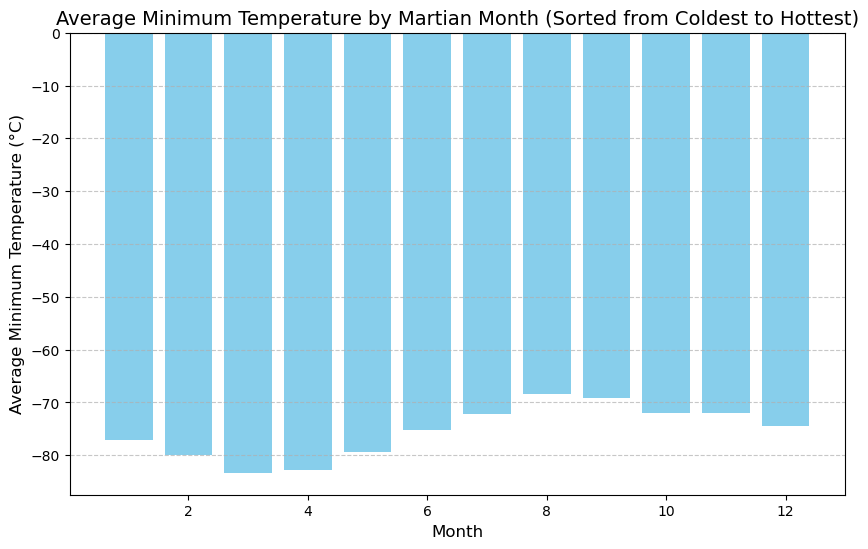

Coldest Month: 3 with Temperature: -83.30729166666667°C
Hottest Month: 8 with Temperature: -68.38297872340425°C


In [41]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_months = average_min_temp_by_month.sort_values(ascending=True)

# Plot the sorted bar graph of the average minimum temperature by month (coldest to hottest)
plt.figure(figsize=(10, 6))
plt.bar(sorted_months.index, sorted_months.values, color='skyblue')

# Add labels and title
plt.title('Average Minimum Temperature by Martian Month (Sorted from Coldest to Hottest)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

coldest_month = sorted_months.idxmin()
hottest_month = sorted_months.idxmax()

# Get the coldest and hottest temperatures
coldest_temp = sorted_months.min()
hottest_temp = sorted_months.max()

# Print the coldest and hottest months and temperatures
print(f"Coldest Month: {coldest_month} with Temperature: {coldest_temp}°C")
print(f"Hottest Month: {hottest_month} with Temperature: {hottest_temp}°C")

In [32]:
# 4. What is the average pressure by month?
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


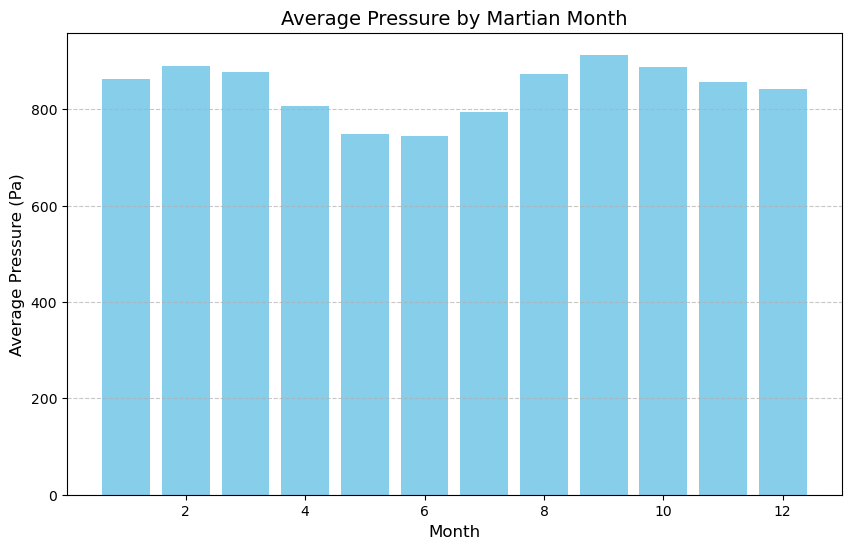

In [35]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color='skyblue')

# Add labels and title
plt.title('Average Pressure by Martian Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

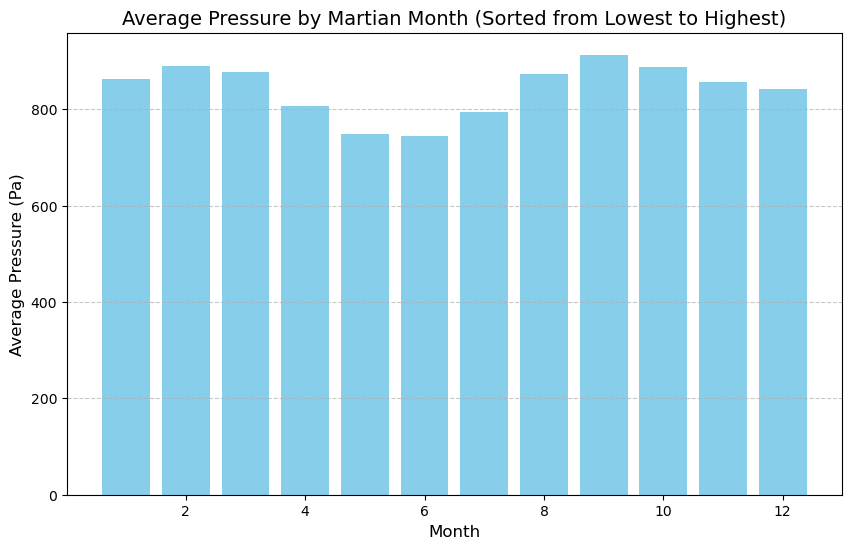

Lowest Pressure Month: 6 with Pressure: 745.0544217687075 Pa
Highest Pressure Month: 9 with Pressure: 913.3059701492538 Pa


In [40]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure_months = average_pressure_by_month.sort_values(ascending=True)

# Plot the sorted bar graph of the average pressure by month (lowest to highest)
plt.figure(figsize=(10, 6))
plt.bar(sorted_pressure_months.index, sorted_pressure_months.values, color='skyblue')

# Add labels and title
plt.title('Average Pressure by Martian Month (Sorted from Lowest to Highest)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Get the lowest and highest pressure months
lowest_pressure_month = sorted_pressure_months.idxmin()
highest_pressure_month = sorted_pressure_months.idxmax()

# Get the lowest and highest pressures
lowest_pressure = sorted_pressure_months.min()
highest_pressure = sorted_pressure_months.max()

# Print the lowest and highest pressure months and their pressures
print(f"Lowest Pressure Month: {lowest_pressure_month} with Pressure: {lowest_pressure} Pa")
print(f"Highest Pressure Month: {highest_pressure_month} with Pressure: {highest_pressure} Pa")

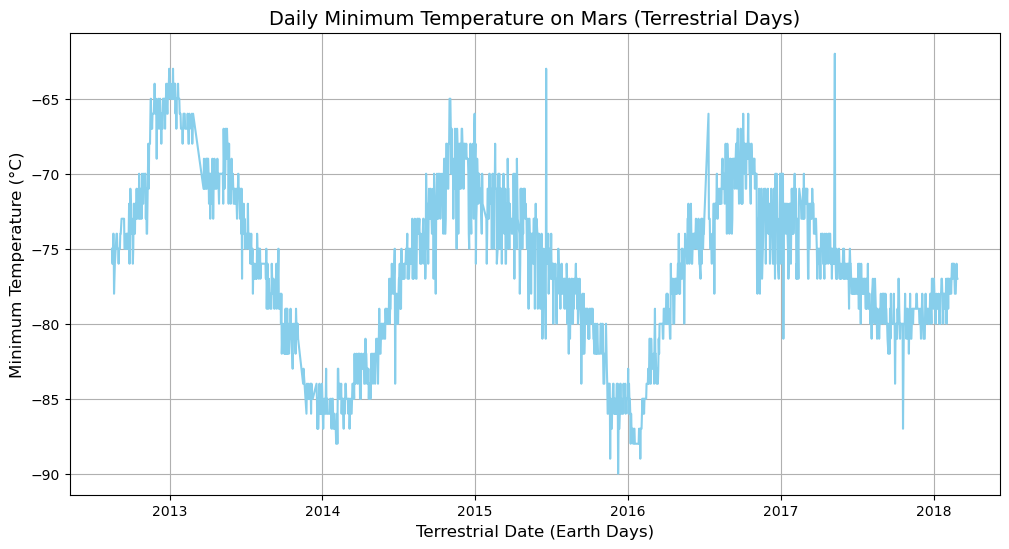

In [39]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], linestyle='-', color='skyblue')

# Add labels and title
plt.title('Daily Minimum Temperature on Mars (Terrestrial Days)', fontsize=14)
plt.xlabel('Terrestrial Date (Earth Days)', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

#### Minimum Temperature

Coldest Month: 3 with Temperature: -83.30729166666667°C
Hottest Month: 8 with Temperature: -68.38297872340425°C

#### Atmospheric Pressure

Lowest Pressure Month: 6 with Pressure: 745.0544217687075 Pa
Highest Pressure Month: 9 with Pressure: 913.3059701492538 Pa

#### Year Length
A Martian year is about 687 Earth days


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
df.to_csv('mars_temperature_data.csv', index=False)

# Confirm the file is written
print("Data has been written to 'mars_temperature_data.csv'.")

Data has been written to 'mars_temperature_data.csv'.


In [43]:
browser.quit()